In [3]:
# Instalar librerías (si no están instaladas)
!pip install numpy pandas matplotlib seaborn scikit-learn tensorflow requests spacy swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=8b80212f29d761feed09c3b77edee8940f5405639b2dc427fd95ed12052c6c7f
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


# Preparación del entorno

Importación de librerías a usar.

In [4]:
# Generacion de numeros (pseudo) aleatorios
import random

# pandas
import pandas as pd

# Seaborn
import seaborn as sns

# Librerías de scikit learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Librerías para crear gráficos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Expresiones regulares
import re

# Librería de procesamiento de lenguaje natural
import spacy

# procesamiento en paralelo en Pandas
import swifter


# Librerías de Tensorflow y ciertos módulos relacioandos con Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau



Definición del estado inicial de los generadores de números pseudoaleatorios, para asegurar que el resultado sea reproducible.

In [ ]:
random.seed(42)

# Implementación de algoritmos de aprendizaje automático

In [ ]:
# Tomar el conjunto de datos iris que ofrece Seaborn
data = sns.load_dataset('iris')


data.head(10)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
# Verificar las columnas y el tamaño del DataFrame
print(data.columns)
print("Shape of DataFrame:", data.shape)


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Shape of DataFrame: (150, 5)


In [ ]:
total_nan = data.isna().sum().sum()

print(f"Número total de valores nulos: {total_nan}")


Número total de valores nulos: 0


In [ ]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
#Selección de características y etiquetas
X = data.drop('species', axis=1)
y = data['species']


In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba (70-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

En el caso que nos ocupa, vemos factible aplicar una proporción de 70%-30% entre los conjuntos de entrenamiento y prueba ya que el tamaño de la muestra es bastante reducido (solo 150 muestras) y las características de los análisis que vamos a realizar nos lo permite manteniendose relativamente fiables.

In [ ]:
#Escalado de Características

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:

encoder = OneHotEncoder(sparse=False)

# Ajustar y transformar las etiquetas de entrenamiento y prueba
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


##Support Vector Machines


In [ ]:


# Inicializar y entrenar el modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
svm_pred = svm_model.predict(X_test)

# Calcular métricas
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')

# Imprimir métricas
print("Support Vector Machines:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)


Support Vector Machines:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


##Random Forest



In [ ]:

# Inicializar y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
rf_pred = rf_model.predict(X_test)

# Calcular métricas
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

print("Random Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)


Random Forest:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Inicializar y entrenar el modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
nb_pred = nb_model.predict(X_test)

# Calcular métricas
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred, average='weighted')
nb_recall = recall_score(y_test, nb_pred, average='weighted')
nb_f1 = f1_score(y_test, nb_pred, average='weighted')

# Imprimir métricas
print("Naive Bayes:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1-score:", nb_f1)


Naive Bayes:
Accuracy: 0.9777777777777777
Precision: 0.9793650793650793
Recall: 0.9777777777777777
F1-score: 0.9777448559670783


##Discusión

Según los resultados obtenidos en el apartado C, el Naive Bayes tiene una accuracy del 97.78%, mientras que tanto Random Forest como SVM alcanzan el 100%. Esto sugiere que Random Forest y SVM clasifican todas las muestras correctamente, mientras que Naive Bayes presenta algunas clasificaciones incorrectas.

En términos de precisión, Naive Bayes muestra un valor del 97.94%, en comparación con el 100% de precisión logrado por Random Forest y SVM. Esto implica que Naive Bayes es ligeramente menos preciso en la identificación de muestras positivas en comparación con los otros dos modelos.

En cuanto al recall, Naive Bayes obtiene un 97.78%, mientras que Random Forest y SVM nuevamente logran un 100%. Esto indica que Naive Bayes no identifica todas las muestras positivas correctamente, a diferencia de Random Forest y SVM que lo hacen de manera perfecta.

El F1-score de Naive Bayes es del 97.77%, mientras que el de Random Forest y SVM es del 100%. Este resultado refleja que la combinación de precisión y recall es perfecta en Random Forest y SVM, mientras que en Naive Bayes hay una pequeña disminución en el rendimiento.

En conclusión, Random Forest y SVM tienen un rendimiento perfecto según los resultados obtenidos (accuracy, precision, recall y f1-score). Entre ellos no hay un claro ganador en términos de métricas de rendimiento, ya que ambos obtienen resultados perfectos. Sin embargo, Random Forest puede ser más fiable cuando se necesita interpretar el modelo (ya que proporciona información sobre la importancia de las características y puede manejar datos con valores perdidos o outliers de manera más robusta) y SVM puede ser preferido en situaciones donde el número de características es alto en comparación con el número de muestras, o cuando se busca maximizar el margen de clasificación entre clases.

# Implementación de algoritmos de aprendizaje automático profundo

Como paso previo, y para evitar perder el archivo de datos en caso de borrado de la sesión de ejecución en Colab, subimos una copia del archivo de datos al Github compartido del equipo.
Así, el archivo estará disponible a través de la URL para su carga con Pandas.


In [7]:
# Variables Globales a este segundo ejercicio
data_file_url = 'https://raw.githubusercontent.com/tnarrosf/unir-mubio01-grupo5/main/python/datos/sentiment_analysis.csv'

# Carga del modelo del idioma inglés de spaCy
nlp = spacy.load('en_core_web_sm')


## Carga y preprocesamiento de los datos


In [8]:
# Cargar en un dataframe desde la URL
df_tuits_raw = pd.read_csv(data_file_url, delimiter=';')

df_tuits_raw.head(20)


,Polaridad,Id_tuit,Fecha,Query,Usuario,Tuit
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,0,1467812579,Mon Apr 06 22:20:17 PDT 2009,NO_QUERY,pardonlauren,I just re-pierced my ears
8,0,1467812723,Mon Apr 06 22:20:19 PDT 2009,NO_QUERY,TLeC,@caregiving I couldn't bear to watch it. And ...
9,0,1467812771,Mon Apr 06 22:20:19 PDT 2009,NO_QUERY,robrobbierobert,"@octolinz16 It it counts, idk why I did either..."


Definimos una funcion que aplica los saneamientos de las cadenas de texto establecidos en el enunciado.


In [9]:
df_tuits_raw.shape

(100000, 6)

In [10]:

def preprocesamiento(mensaje):
  # todo a minusculas
  mensaje = mensaje.lower()
  # eliminar URLS. Re personalizada a partir de https://regexlib.com/REDetails.aspx?regexp_id=3001
  urls_re = r'((http(s)?://)|(www\.))[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(:[a-zA-Z0-9]*)?/?([a-zA-Z0-9\-\._\?\,\'/\\\+&amp;%\$#\=~])*'
  mensaje = re.sub(urls_re, '', mensaje)

  # eliminar emoticonos: están expresados como una palabra (o dos) entre dos asteriscos
  emoti_re = r'\*\w+(\s\w+)?\*'
  mensaje = re.sub(emoti_re, '', mensaje)

  # Eliminar caracteres especiales y signos de puntuacion
  mensaje = re.sub(r'[^a-z0-9\s]', '', mensaje)

  # Lematización con spacy excluyendo los stopwords
  doc = nlp(mensaje)
  lemmatized_words = [word.lemma_ for word in doc if not word.is_space | word.is_stop]

  mensaje_limpio = ' '.join(lemmatized_words)
  return mensaje_limpio


Para nuestra actividad nos interesan principalmente los campos Polaridad (0 - Negativo, 1 - Positivo) y Tuit (texto del mensaje) procesado.

Generamos un nuevo DataFrame con los tuits procesados, y la Polaridad.

In [11]:
print(df_tuits_raw.columns.tolist())
df_tuits_procesados = df_tuits_raw[['Polaridad', 'Tuit']].copy()
# este paso tarda alrededor de 13 minutos
# La librería swifter trata de optimiiar la ejecución de funciones de tipo lambda
# en dataframes de pandas.
df_tuits_procesados['Tuit'] = df_tuits_procesados['Tuit'].swifter.apply(preprocesamiento)

df_tuits_procesados

['Polaridad', 'Id_tuit', 'Fecha', 'Query', 'Usuario', 'Tuit']


Pandas Apply:   0%|          | 0/100000 [00:00<?, ?it/s]

,Polaridad,Tuit
0,0,upset not update facebook texte cry result sch...
1,0,kenichan dive time ball manage save 50 rest bound
2,0,body feel itchy like fire
3,0,nationwideclass behave m mad not
4,0,kwesidei crew
...,...,...
99995,1,grandma make dinenr mum
99996,1,midmorne snack time bowl cheese noodle yum
99997,1,shadela like terminiator movie come like 3 word d
99998,1,destinyhope92 m great thaanks wbuu


Para poder entrenar la red neuronal, necesitamos transformar en tokens numéricos las palabras, a través de la función `Tokenizer`.
Además, para equilibrar las secuencias de tokens y que todas tengan una longitud equivalente, aplicamos la función `pad_sequences` sobre los tokens obtenidos.


In [12]:
# Definir los parámetros para la tokenización y la secuencia
vocab_size = 10000
# max_length = 100
trunc_type = 'post'
padding_type = 'post'

# Tokenizar y convertir los tweets a secuencias
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df_tuits_procesados['Tuit'])
sequences = tokenizer.texts_to_sequences(df_tuits_procesados['Tuit'])

# calculamos el tamaño máximo de las secuencias, para el padding
max_sequence_length = max(len(seq) for seq in sequences)
print(max_sequence_length)


29


In [13]:
# Ajustamos el tamaño de todas las secuencias al tamaño máximo encontrado, más uno
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length+1, padding=padding_type, truncating=trunc_type)

## División del conjunto de datos



Separación del conjunto de datos en tres grupos: uno de entrenamiento, uno de validación y otro de testeo.

La proporción será 60% - 20% - 20%.

In [15]:
# Selección de características (X) y etiquetas (y)
X = padded_sequences
y = df_tuits_procesados['Polaridad']

# Separamos el grupo de entrenamiento, del resto (validación + prueba)
X_train, X_resto, y_train, y_resto = train_test_split(X, y, test_size=0.4, random_state=42)

# Separar resto en validación y prueba
X_val, X_test, y_val, y_test = train_test_split(X_resto, y_resto, test_size=0.5, random_state=42)



In [16]:
print("Entrenamiento", X_train.shape, y_train.shape)
print("Validacion", X_val.shape, y_val.shape)
print("Test", X_test.shape, y_test.shape)


Entrenamiento (60000, 30) (60000,)
Validacion (20000, 30) (20000,)
Test (20000, 30) (20000,)


## Definición y entrenamiento del modelo de Red Neuronal

In [17]:
# Parametros de sequencia (reutiliza algunos definidos para la tokenizacion)
embedding_dim = 100
max_length = max_sequence_length + 1 # el tamaño al que hemos ajustado las series

# Crear el modelo de red neuronal
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length)) # Añadir capa de embedding
model.add(LSTM(128, return_sequences=True)) # Añadir capas LSTM
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# Adam como algoritmo de Optimizacion. usamos un learning_rate algo alto para mejorar tiempos
optimizador = Adam(learning_rate=0.01)

model.compile(optimizer= optimizador, loss='binary_crossentropy', metrics=['accuracy'])

Al entrenar el modelo, le pasamos un callback para la reduccion del learning_rate. Si despues de un numero determinado de rondas (epoch) no se
aprecia mejora en la metrica indicada, reduce el learning_rate usando el factor
hasta un minimo.
En nuestro caso: si despues de 6 rondas no hay mejoras en la perdida, disminuye el learnin_rate hasta un minimo de 0,0001


In [18]:
# Reduccion del learning_rate, para mejorar el ajuste:
reductor_lr = ReduceLROnPlateau('val_loss', factor=0.1, patience=6, min_lr=0.0001)


Entenamiento con validación del modelo.

In [19]:
# Entrenamiento del modelo
entreno = model.fit(X_train, y_train, epochs=50, batch_size=100, validation_data=(X_val, y_val), callbacks=[reductor_lr])

Epoch 1/50
600/600 [==============================] - 94s 149ms/step - loss: 0.6175 - accuracy: 0.6499 - val_loss: 0.5206 - val_accuracy: 0.7414 - lr: 0.0100
Epoch 2/50
600/600 [==============================] - 86s 144ms/step - loss: 0.4702 - accuracy: 0.7762 - val_loss: 0.5025 - val_accuracy: 0.7604 - lr: 0.0100
Epoch 3/50
600/600 [==============================] - 91s 151ms/step - loss: 0.4193 - accuracy: 0.8062 - val_loss: 0.5089 - val_accuracy: 0.7563 - lr: 0.0100
Epoch 4/50
600/600 [==============================] - 89s 148ms/step - loss: 0.3865 - accuracy: 0.8233 - val_loss: 0.5195 - val_accuracy: 0.7582 - lr: 0.0100
Epoch 5/50
600/600 [==============================] - 86s 143ms/step - loss: 0.3605 - accuracy: 0.8372 - val_loss: 0.5355 - val_accuracy: 0.7553 - lr: 0.0100
Epoch 6/50
600/600 [==============================] - 89s 148ms/step - loss: 0.3386 - accuracy: 0.8483 - val_loss: 0.5676 - val_accuracy: 0.7521 - lr: 0.0100
Epoch 7/50
600/600 [==============================] 

## Discusión

### Función de activación aplicada
La función de activación más adecuada para la última capa es sigmoid ya que esta función es apropiada porque produce una probabilidad entre 0 y 1, lo cual es ideal para clasificaciones binarias permitiendo interpretar el resultado como la probabilidad de que el sentimiento sea positivo. La función de pérdida más adecuada para un problema de clasificación binaria es binary_crossentropy ya que esta función de pérdida mide la divergencia entre las distribuciones de probabilidad verdadera y predicha penalizando fuertemente las predicciones incorrectas y es adecuada porque se enfoca en mejorar la precisión de clasificación binaria al minimizar las diferencias entre las etiquetas verdaderas y las predicciones del modelo.

La función sigmoid es especialmente útil para la salida de una red neuronal en tareas de clasificación binaria porque convierte la salida en una probabilidad permitiendo una interpretación directa de los resultados. Una salida cercana a 0 indica un sentimiento negativo mientras que una salida cercana a 1 indica un sentimiento positivo. Binary crossentropy es ideal para problemas de clasificación binaria porque cuantifica la diferencia entre las distribuciones de probabilidad predicha y verdadera. Al penalizar más fuertemente las predicciones incorrectas ayuda a mejorar la precisión del modelo en identificar correctamente las clases de sentimiento.

### Gráficas de análisis del modelo
Gráficos de la evolución de la función de pérdida y las métricas

In [20]:
# configuracion general graficas

plt.figure(figsize=(12, 12))

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

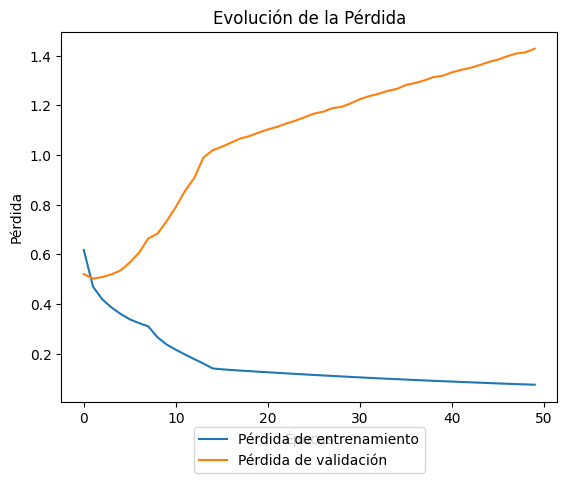

In [21]:
# Gráfico de la función de pérdida
plt.subplot(1, 1, 1)
plt.plot(entreno.history['loss'], label='Pérdida de entrenamiento')
plt.plot(entreno.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=1)
plt.title('Evolución de la Pérdida')
plt.show()


Text(0.5, 1.0, 'Evolución de la Precisión')

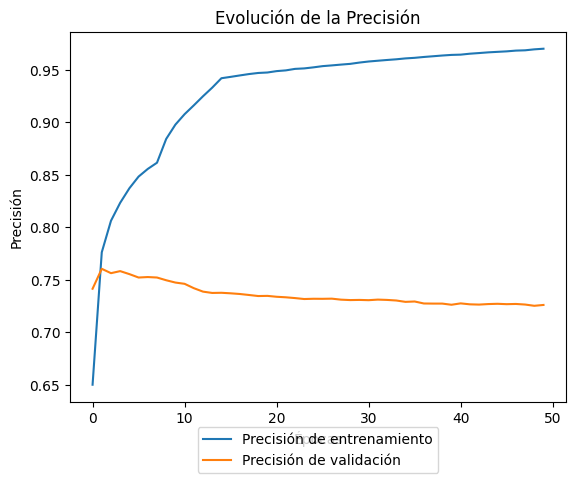

In [22]:
# Gráfico de la métrica de precisión
plt.subplot(1, 1, 1)
plt.plot(entreno.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(entreno.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=1)
plt.title('Evolución de la Precisión')